### Aud
- **intro** : "L'espérance de vie est un indicateur clé  du développement humain. Les dépenses en santé sont souvent considérées comme un levier majeur pour améliorer les soins de santé, réduire les maladies et, en fin de compte, prolonger la vie. Cependant, il est intéressant de se demander si cette relation est toujours linéaire et si, au-delà d'un certain niveau, l'augmentation des dépenses continue à avoir un impact significatif."
- **Question** : Les dépenses en santé contribuent-elles à améliorer l'espérance de vie ?
- **objectif** : Notre objectif est d'analyser si une augmentation des dépenses en santé par habitant contribue réellement à améliorer l'espérance de vie dans les pays asiatiques et d'examiner la nature de cette relation.

## 1- La régression polynomiale :  
- **Question** : Les dépenses en santé contribuent-elles à améliorer l'espérance de vie ?
### Indicateurs sélectionnés :  
- **Dépenses en santé**  : Dépenses annuelles en santé par habitant en dollars américains.  
- **Espérance de vie**  : Durée moyenne de vie à la naissance.

### Hypothèse :
- **H₀**  : Les dépenses en santé n'ont pas d'impact significatif sur l'espérance de vie.  
- **H₁**  : Les dépenses en santé ont un impact significatif sur l'espérance de vie, avec une relation non linéaire.

### Aud
Nous allons maintenant explorer si les données soutiennent l'idée que les dépenses en santé sont un levier efficace pour augmenter l'espérance de vie et si cette relation est sujette à des limites.

In [16]:
import pandas as pd
# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")

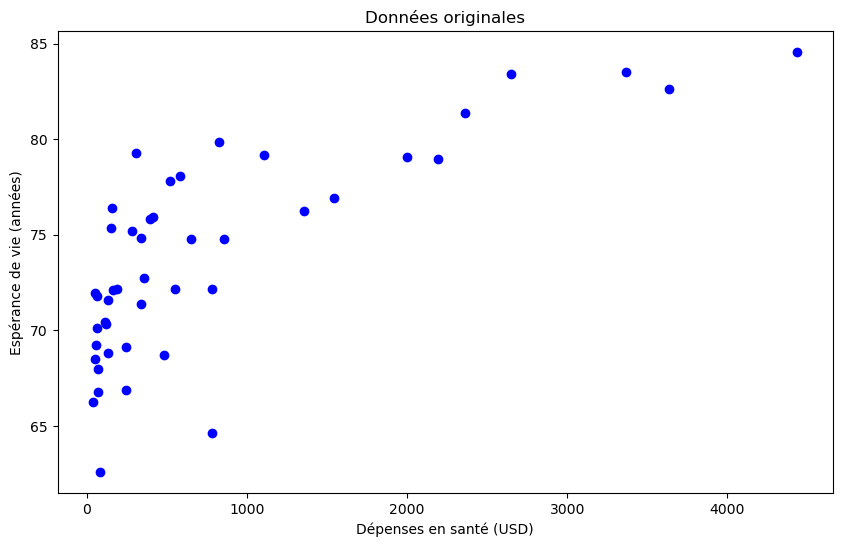

In [18]:

import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Charger les données nettoyées
data = pd.read_csv('data_cleaned.csv')
X = data[['Depenses_en_sante_par_habitant']].values
y = data['Esperance_de_vie'].values

plt.figure(figsize=(10, 6))

# Vérifier la distribution des données
plt.scatter(X, y, color='blue', label='Données réelles')
plt.xlabel('Dépenses en santé (USD)')
plt.ylabel('Espérance de vie (années)')
plt.title('Données originales')
plt.show()




### Remarque
- On observe une augmentation claire de l'espérance de vie avec les dépenses en santé. Cela confirme qu'il existe une relation positive entre les deux variables.
- Les dépenses en santé peuvent avoir un impact significatif sur l'espérance de vie jusqu'à un certain seuil, surtout dans des pays où les services de base sont déjà bien couverts l'augmantation des dépenses en santé  peut avoir un effet limité , donc après quoi cet effet pourrait diminuer ?
- La régression linéaire simple pourrait ne pas capturer la complexité de cette relation.  
- Une régression polynomiale permet de modéliser cette relation avec une courbe, en ajustant le modèle à une forme quadratique ou d'un degré supérieur.  


In [26]:
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

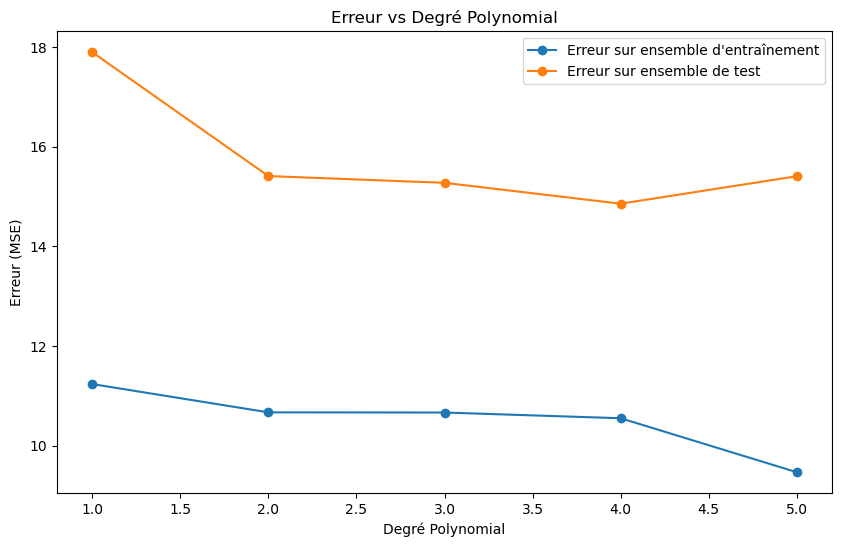

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Tester différents degrés
degrees = range(1, 6)
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Visualiser les erreurs
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur ensemble d\'entraînement', marker='o')
plt.plot(degrees, test_errors, label='Erreur sur ensemble de test', marker='o')
plt.title('Erreur vs Degré Polynomial')
plt.xlabel('Degré Polynomial')
plt.ylabel('Erreur (MSE)')
plt.legend()
plt.show()


**Remarque** :
- Courbe d'erreur sur l'ensemble d'entraînement (ligne bleue) :  
On observe une diminution continue de l'erreur (MSE) à mesure que le degré polynomial augmente. Cela est attendu, car des modèles plus complexes (avec un degré plus élevé) s'ajustent mieux aux données d'entraînement, capturant plus de détails.  
  
- Courbe d'erreur sur l'ensemble de test (ligne orange) :  
L'erreur diminue initialement jusqu'à un certain degré (autour de 3 ou 4) puis commence à augmenter à nouveau pour un degré supérieur (5). Cette augmentation de l'erreur sur les données de test, malgré une erreur réduite sur les données d'entraînement, est un signe typique de sur-apprentissage (overfitting).  
  
- Point critique :  
Le degré optimal est celui où l'erreur sur l'ensemble de test est minimale sans augmenter de manière significative l'erreur sur l'ensemble d'entraînement. Ici, le degré 3 semble être un bon compromis :
L'erreur sur l'ensemble de test est stable et relativement faible.
Le modèle reste suffisamment simple pour éviter le sur-apprentissage.

===> Utilisez un modèle polynomial de degré 3. Ce choix permet de capturer la non-linéarité de la relation entre les dépenses en santé et l'espérance de vie tout en minimisant le risque de sur-apprentissage.

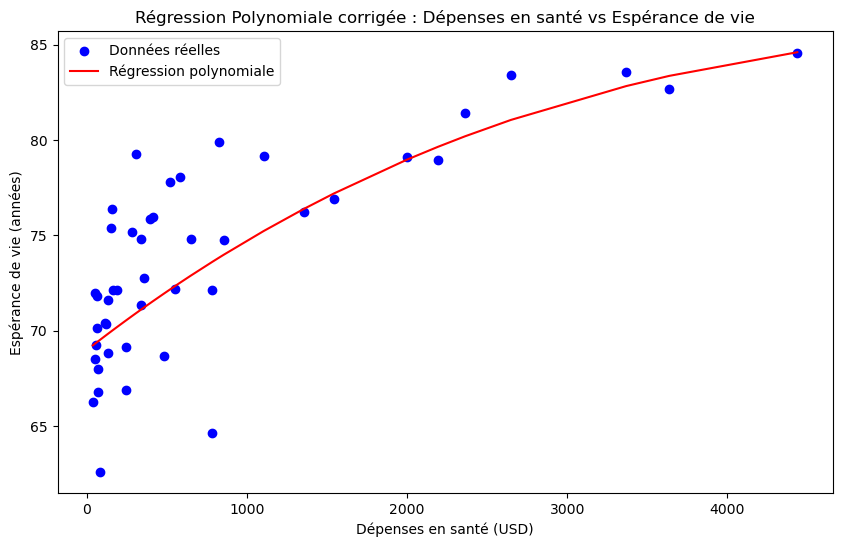

In [30]:


# Appliquer la transformation polynomiale (degré 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Créer et ajuster le modèle de régression polynomiale
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Prédictions
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Inverser la normalisation pour afficher les axes dans leur unité originale
X_original = scaler.inverse_transform(X_scaled)

# Trier les points pour une courbe plus lisse
sorted_indices = np.argsort(X_original.flatten())
X_sorted = X_original[sorted_indices]
y_pred_sorted = model.predict(poly.transform(scaler.transform(X_sorted)))

plt.scatter(X_original, y, color='blue', label='Données réelles')  # Données réelles
plt.plot(X_sorted, y_pred_sorted, color='red', label='Régression polynomiale')  # Courbe ajustée

plt.title('Régression Polynomiale corrigée : Dépenses en santé vs Espérance de vie')
plt.xlabel('Dépenses en santé (USD)')
plt.ylabel('Espérance de vie (années)')
plt.legend()
plt.show()


**Remarque** :  
- Les points bleus (les données réelles) sont globalement bien alignés avec la courbe rouge (modèle polynomial), ce qui montre une bonne adéquation. Cependant, il y a une certaine dispersion, ce qui suggère que d'autres facteurs (au-delà des dépenses en santé) influencent l'espérance de vie.
- Lorsque les dépenses en santé sont faibles (0 à environ 1000 USD par habitant), l'impact sur l'espérance de vie est plus marqué. Cela suggère que les investissements dans des systèmes de santé de base ont un effet majeur sur l'amélioration de la qualité de vie.
- Dans la zone où les dépenses dépassent 2000 USD, les gains en espérance de vie sont plus modestes, atteignant une sorte de plateau.

**Interpretation** :
- Dans les pays asiatiques avec de faibles dépenses en santé, une augmentation de ces dépenses peut considérablement améliorer l'espérance de vie.
- Dans les pays où les dépenses sont déjà élevées, les gains supplémentaires en espérance de vie sont limités, soulignant la nécessité d'explorer d'autres leviers, comme l'amélioration des conditions environnementales ou l'éducation à la santé.

graphique représente une régression polynomiale (courbe rouge) modélisant la relation entre les dépenses en santé par habitant (USD) et l'espérance de vie (années), accompagnée d'une zone d'incertitude (en rose) qui illustre la variabilité des prédictions.

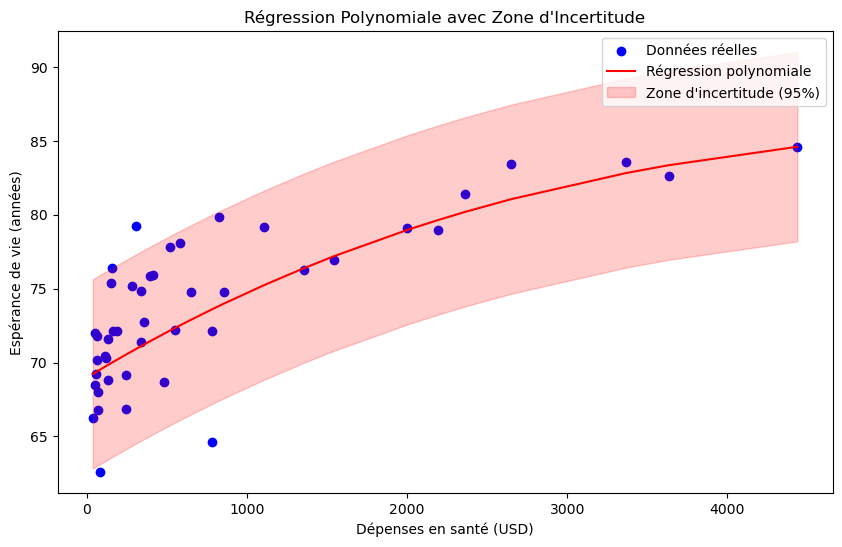

R² (entraînement) : 0.6436


In [37]:
from sklearn.metrics import r2_score

# Calcul des résidus sur l'ensemble d'entraînement
residuals = y_train - y_pred_train
std_dev = np.std(residuals)

# Calcul des prédictions moyennes et des marges d'incertitude
y_pred_mean = model.predict(poly.transform(scaler.transform(X_sorted)))
lower_bound = y_pred_mean - 1.96 * std_dev  # Intervalle de confiance à 95%
upper_bound = y_pred_mean + 1.96 * std_dev


# Calcul de R^2 pour les ensembles d'entraînement 
r2_train = r2_score(y_train, y_pred_train)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X_original, y, color='blue', label='Données réelles')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Régression polynomiale')
plt.fill_between(X_sorted.flatten(), lower_bound, upper_bound, color='red', alpha=0.2, label='Zone d\'incertitude (95%)')

plt.title('Régression Polynomiale avec Zone d\'Incertitude')
plt.xlabel('Dépenses en santé (USD)')
plt.ylabel('Espérance de vie (années)')
plt.legend()
plt.show()

print(f"R² (entraînement) : {r2_train:.4f}")


**Remarque** :
- Zone d'incertitude : La zone rose montre une intervalle de confiance autour des prédictions du modèle. Cela indique où les vraies valeurs de l'espérance de vie sont susceptibles de se trouver avec une probabilité de 95 %.
- Régression polynomiale (ligne rouge) : La courbe suit de près les données, montrant que le modèle capture la relation de manière adéquate. Cependant, la pente diminue lorsque les dépenses dépassent 2000 USD, suggérant un effet de saturation.
- Au centre, où la densité des points est plus élevée, la zone est plus étroite, indiquant des prédictions plus fiables.
- Elle est plus large aux extrémités (très faibles ou très élevées dépenses), ce qui reflète une incertitude accrue due à moins de données disponibles dans ces zones.
  
**Interp**  :
- Investissement initial efficace : Lorsque les dépenses en santé augmentent de 0 à environ 2000 USD, la courbe montre une augmentation rapide de l'espérance de vie. Cela suggère qu'investir dans les systèmes de santé de base peut avoir un impact significatif.
- Diminution des rendements : Au-delà de 2000 USD, les gains en espérance de vie deviennent plus modestes. Cela pourrait indiquer que des facteurs non liés aux dépenses en santé (par exemple, le mode de vie ou les infrastructures) limitent davantage l'espérance de vie.
- Le modèle polynomial montre une corrélation modérée, avec un 𝑅2=64% , ce qui indique que les dépenses en santé expliquent une partie significative, mais non totale, de la variation de l’espérance de vie.

**Pourquoi utiliser la régression Ridge ?** 
- Notre première analyse a montré que les dépenses en santé ont un impact significatif sur l'espérance de vie, particulièrement dans les phases initiales d'investissement. Cependant, les résultats indiquent également que cette seule variable ne suffit pas à expliquer toute la variation de l'espérance de vie. Le coefficient de détermination (𝑅2=64%) nous montre qu'une partie non négligeable des variations reste inexpliquée.
- Pour répondre à cette question, nous avons utilisé une régression Ridge. Cette méthode est particulièrement utile lorsqu'il y a plusieurs variables explicatives potentiellement corrélées, car elle permet de réduire le risque de surajustement et de sélectionner les facteurs ayant un impact net et significatif sur l'espérance de vie.
- L'objectif est donc d'identifier les variables explicatives les plus influentes sur l'espérance de vie parmi un ensemble de facteurs, tout en contrôlant les éventuelles corrélations entre ces variables.

## 2- La Régression Ridge :  
- **Question** : Quelles sont les principaux facteurs influençant l’espérance de vie dans les pays asiatiques ?

### Indicateurs sélectionnés :  
- **Variable dépendante (Y) :**
   - Espérance de vie à la naissance.
- **Variables indépendantes (X) :**
  - Dépenses en santé (USD).
  - Accès à l'électricité (%).
  - Accès à l'eau potable (%).
  - Taux de pauvreté (% vivant avec moins de 2,15 $/jour).

- nous devons identifier les autres facteurs susceptibles d'influencer l'espérance de vie. Ces facteurs pourraient inclure des dimensions liées aux infrastructures, aux conditions socio-économiques ou à l'accès aux ressources essentielles, comme l'eau potable ou l'électricité.

In [48]:
import pandas as pd

# Chargement des données
data = pd.read_csv('data_cleaned.csv')

In [50]:
# Sélection des variables
X = data[['Depenses_en_sante_par_habitant', 'Acces_electricite', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Esperance_de_vie']

In [54]:
from sklearn.preprocessing import StandardScaler

# Normalisation des variables indépendantes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification après normalisation
print("Données normalisées (exemple) :", X_scaled[:5])


Données normalisées (exemple) : [[-6.76993075e-01  3.80125257e-02 -2.09426058e+00 -1.97154738e-16]
 [-2.23804654e-01  4.05703779e-01  7.60257182e-01 -7.16666988e-01]
 [-5.20670620e-01  4.05703779e-01  3.20210509e-01 -1.97154738e-16]
 [ 3.07791817e-01  4.05703779e-01  7.57599596e-01 -1.97154738e-16]
 [-7.05453706e-01 -2.01786118e-01  5.14893567e-01 -1.97154738e-16]]


In [62]:
from sklearn.model_selection import train_test_split

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)


Dimensions de l'ensemble d'entraînement : (36, 4)
Dimensions de l'ensemble de test : (9, 4)


In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Ridge
ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster alpha plus tard

# Entraînement du modèle
ridge.fit(X_train, y_train)
# Prédictions
y_pred = ridge.predict(X_test)


In [70]:

from sklearn.model_selection import GridSearchCV

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Validation croisée avec GridSearchCV
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_values}, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

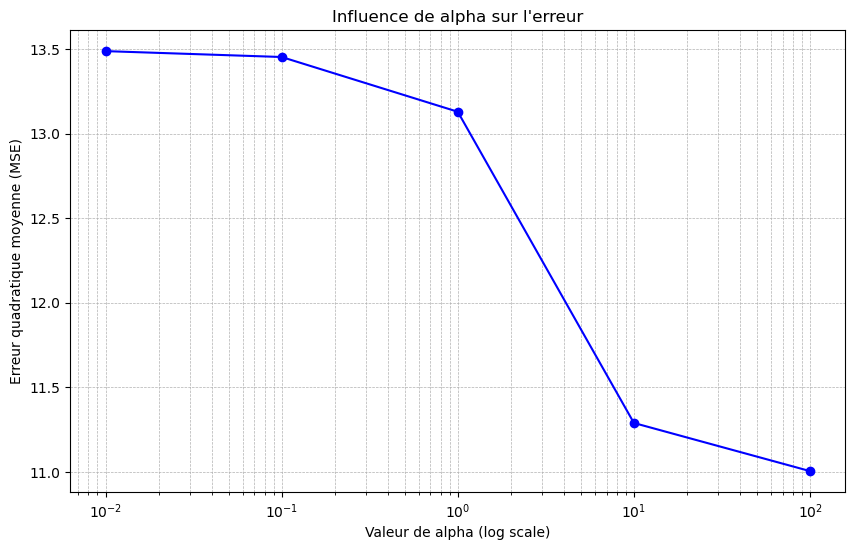

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Liste des valeurs possibles pour alpha
alpha_values = [0.01, 0.1, 1, 10, 100]

# Liste pour stocker les erreurs
errors = []

# Calcul des erreurs pour chaque alpha
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Tracer les erreurs
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, errors, marker='o', linestyle='-', color='blue')
plt.xscale('log')  # Échelle logarithmique pour mieux visualiser les valeurs d'alpha
plt.xlabel("Valeur de alpha (log scale)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Influence de alpha sur l'erreur")
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


**Rappel** : 
- alpha est le paramètre de régularisation. Il contrôle la force de la pénalisation appliquée aux coefficients du modèle. Cette régularisation vise à réduire le risque de sur-ajustement (overfitting) en imposant une contrainte sur la taille des coefficients.
- Lorsque alpha = 0, la régression Ridge devient une régression linéaire classique, sans régularisation. Cela peut entraîner un sur-ajustement si les données sont bruyantes ou si le nombre de variables explicatives est élevé.  
- Lorsque alpha est élevé, le modèle pénalise davantage les grands coefficients, ce qui force certains coefficients à se rapprocher de 0, sans pour autant les annuler complètement.mais peut introduire un biais important (sous-ajustement).

In [74]:


# Meilleur alpha
best_alpha = 10
print(f"Meilleure valeur pour alpha : {best_alpha}")

# Réentraînement avec le meilleur alpha
ridge_optimized = Ridge(alpha=best_alpha)
ridge_optimized.fit(X_train, y_train)

# Prédictions finales
y_pred_optimized = ridge_optimized.predict(X_test)

# Extraction des coefficients et de leur importance
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': ridge_optimized.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


Meilleure valeur pour alpha : 10
                         Variable  Coefficient
0  Depenses_en_sante_par_habitant     2.749660
2               Acces_eau_potable     1.647981
1               Acces_electricite     0.428792
3                   Taux_pauvrete    -0.275604


- Les coefficients positifs indiquent des variables ayant une influence positive sur l’espérance de vie. Plus le coefficient est élevé, plus son influence est forte.
- Les coefficients négatifs indiquent des variables ayant une influence négative (ou inverse) sur l’espérance de vie.
- Les coefficients proches de zéro sont fortement atténués par la régularisation Ridge, ce qui signifie que ces variables ne contribuent que très peu à la prédiction.

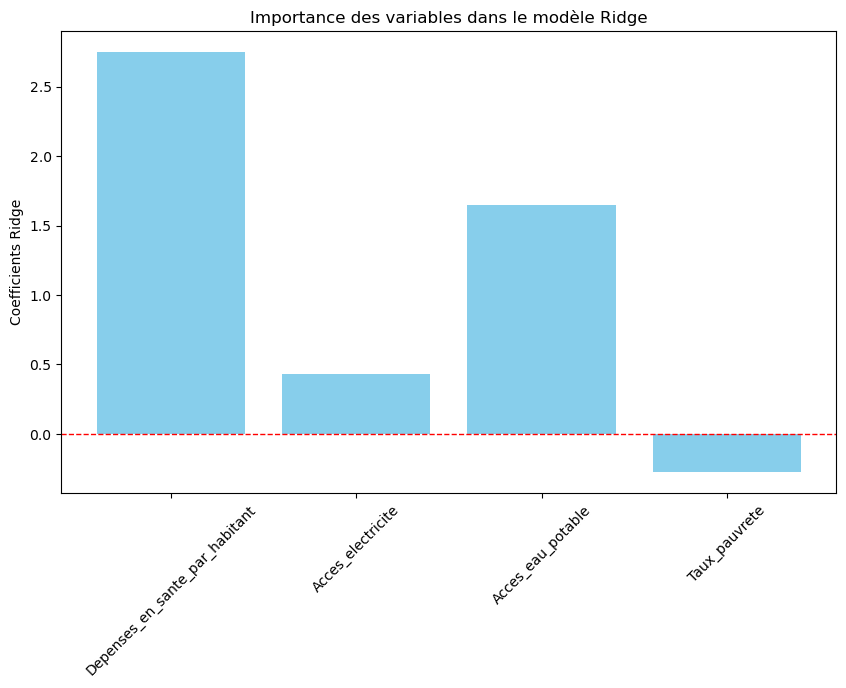

In [68]:
import matplotlib.pyplot as plt

# Visualiser les coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel("Coefficients Ridge")
plt.title("Importance des variables dans le modèle Ridge")
plt.xticks(rotation=45)
plt.show()

- le taux de pauvreté :Comme prévu, le taux de pauvreté exerce une influence négative sur l'espérance de vie. Cela s'explique par le fait qu'un taux de pauvreté élevé limite l'accès aux services essentiels tels que les soins de santé, l'eau potable et une nutrition adéquate. Cependant, la valeur relativement faible de ce coefficient (-0.57) suggère que l'effet direct du taux de pauvreté est partiellement atténué par d'autres facteurs du modèle.

- Dépenses en santé par habitant (2.75) :Les dépenses en santé par habitant ont le coefficient le plus élevé dans notre modèle. Cela confirme que des investissements plus importants dans les systèmes de santé se traduisent par une amélioration notable de l'espérance de vie. Cela corrobore les conclusions de notre première analyse, en soulignant l'importance cruciale de ce facteur

- Accès à l'eau potable (1.65) : Un meilleur accès à l'eau potable joue également un rôle significatif. Cela est logique, car une meilleure disponibilité de l'eau potable favorise une meilleure hygiène et réduit les maladies transmissibles, contribuant ainsi à l'amélioration de la santé publique et, par conséquent, à une espérance de vie plus élevée

- Accès à l'électricité (0.43) : Bien que l'effet soit moins marqué, l'accès à l'électricité a un impact positif sur l'espérance de vie. Ce lien peut être indirect, l'électricité permettant d'améliorer les infrastructures, comme les hôpitaux, et les conditions de vie générales.

**Conclusion** :  
Ces résultats montrent que plusieurs facteurs interagissent pour influencer l'espérance de vie. Si les dépenses en santé restent le levier le plus puissant, d'autres éléments, comme l'accès à l'eau potable et l'amélioration des conditions socio-économiques, méritent une attention particulière. Cela justifie une approche multidimensionnelle pour améliorer durablement l'espérance de vie dans les pays asiatiques.

### Conclusion globale
Les deux analyses confirment que l’espérance de vie dans les pays asiatiques est influencée par un ensemble de facteurs complexes, avec des dépenses en santé jouant un rôle central. Cependant, la qualité des infrastructures (accès à l'eau potable et à l'électricité) et la réduction de la pauvreté sont également des leviers clés.  
  
La régression polynomiale met en lumière une relation non linéaire entre les dépenses en santé et l'espérance de vie, suggérant une limite aux rendements supplémentaires des dépenses en santé.
La régression Ridge élargit la perspective en soulignant que les infrastructures et les conditions socio-économiques influencent également l’espérance de vie.

## 3-  La régression logistique  

  **Objectif** :
Prédire si un pays asiatique a un taux de mortalité infantile élevé (> 30 décès pour 1 000 naissances vivantes) en se basant sur les dépenses en santé, l'accès à l'eau potable et le taux de pauvreté.  
 
- Modèle initial (sans oversampling) :  
Le modèle avait de grandes difficultés à prédire correctement la classe minoritaire ("Élevé").  
Le rappel pour cette classe était de 0%, indiquant une incapacité totale à détecter les pays à mortalité infantile élevée.
-Modèle après oversampling (SMOTE) :
Le rappel pour la classe "Élevé" a atteint 100%, montrant que le modèle a appris à mieux détecter cette classe.  
Cependant, la précision pour cette classe est restée relativement basse (43%), ce qui reflète encore des erreurs de classification entre les deux classes.    
L'exactitude globale du modèle est de 71%, ce qui est raisonnable pour une analyse binaire sur un jeu de données initialement déséquilibré.
- Importance des variables :
Dépenses en santé :

Coefficient : -0.73
Les dépenses en santé élevées diminuent la probabilité qu'un pays ait un taux de mortalité infantile élevé.
Accès à l'eau potable :

Coefficient : -0.86
Un meilleur accès à l'eau potable réduit fortement la probabilité d'un taux de mortalité infantile élevé.
Taux de pauvreté :

Coefficient : 0.08
Une augmentation du taux de pauvreté est associée à une probabilité accrue d'un taux de mortalité infantile élevé.

In [50]:
import pandas as pd
import numpy as np

# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")

# Créer la variable cible binaire
data['Mortalite_infantile_elevee'] = np.where(data['Taux_mortalite_infantile'] > 30, 1, 0)

# Sélectionner les variables explicatives
X = data[['Depenses_en_sante_par_habitant', 'Acces_eau_potable', 'Taux_pauvrete']]
y = data['Mortalite_infantile_elevee']

# Vérifier les données manquantes
print("Données manquantes :")
print(X.isnull().sum())

# Afficher un aperçu des données
print("\nAperçu des données :")
print(X.head())
print("\nVariable cible (Mortalité infantile élevée) :")
print(y.value_counts())

Données manquantes :
Depenses_en_sante_par_habitant    0
Acces_eau_potable                 0
Taux_pauvrete                     0
dtype: int64

Aperçu des données :
   Depenses_en_sante_par_habitant  Acces_eau_potable  Taux_pauvrete
0                       80.288055          76.722255       2.014286
1                      552.000000          99.941516       0.400000
2                      243.000000          96.362082       2.014286
3                     1105.324829          99.919899       2.014286
4                       50.664131          97.945676       2.014286

Variable cible (Mortalité infantile élevée) :
Mortalite_infantile_elevee
0    36
1     9
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Vérifier les dimensions des ensembles
print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")


Ensemble d'entraînement : 31 échantillons
Ensemble de test : 14 échantillons


**Interprétation des résultats du modèle**
- Coefficients des variables explicatives :  
  
Dépenses en santé par habitant (Depenses_en_sante_par_habitant) :   
Coefficient : -0.727052  
Une augmentation des dépenses en santé est associée à une probabilité réduite d'avoir une mortalité infantile élevée.  
Ce résultat est conforme à l'hypothèse : des dépenses en santé plus importantes contribuent à améliorer les conditions de santé et à réduire la mortalité infantile.  
  
Accès à l'eau potable (Acces_eau_potable) :   
Coefficient : -0.858833  
Une amélioration de l'accès à l'eau potable est également associée à une probabilité réduite d'avoir une mortalité infantile élevée.  
Cela montre que l'accès à l'eau potable joue un rôle clé dans la réduction des risques sanitaires.  
  
Taux de pauvreté (Taux_pauvrete) :  
Coefficient : 0.079315  
Une augmentation du taux de pauvreté est associée à une probabilité accrue d'avoir une mortalité infantile élevée.  
Ce résultat est également cohérent : la pauvreté est un facteur majeur de vulnérabilité dans les systèmes de santé et d'accès aux infrastructures.  

- Intercept :  
    -1.825495  
Ce paramètre représente la probabilité de base (log-odds) d'une mortalité infantile élevée lorsqu'aucune des variables explicatives n'est prise en compte.  
Une valeur négative indique une faible probabilité de mortalité infantile élevée dans l'ensemble global des pays.

**Résumé des métriques**  
Précision (precision) :  
Pour la classe Non élevé : 0.79 (79%)  
→ Sur toutes les prédictions "Non élevé", 79% étaient correctes.  
Pour la classe Élevé : 0.00  
→ Le modèle n'a pas réussi à identifier correctement les cas "Élevé".    
  
Rappel (recall) :  
Pour la classe Non élevé : 1.00 (100%)  
→ Tous les cas réellement "Non élevé" ont été correctement prédits.  
Pour la classe Élevé : 0.00  
→ Aucun des cas réellement "Élevé" n'a été détecté. #


**Déséquilibre des classes :**
- Le modèle est performant pour la classe Non élevé, mais ne parvient pas à détecter correctement les cas de mortalité infantile élevée (classe "Élevé").  
Cela est probablement dû à un déséquilibre dans les données (11 pour "Non élevé" contre seulement 3 pour "Élevé").
- Le modèle semble privilégier la classe majoritaire ("Non élevé"), ce qui conduit à de mauvaises performances sur la classe minoritaire ("Élevé").

Utilisation de l'Oversampling pour équilibrer les classes avec SMOTE
Le SMOTE (Synthetic Minority Oversampling Technique) est une méthode efficace pour équilibrer les classes dans un jeu de données en générant artificiellement des échantillons de la classe minoritaire.

Taille après oversampling : (50, 3)
Répartition des classes après oversampling :
Mortalite_infantile_elevee
0    25
1    25
Name: count, dtype: int64


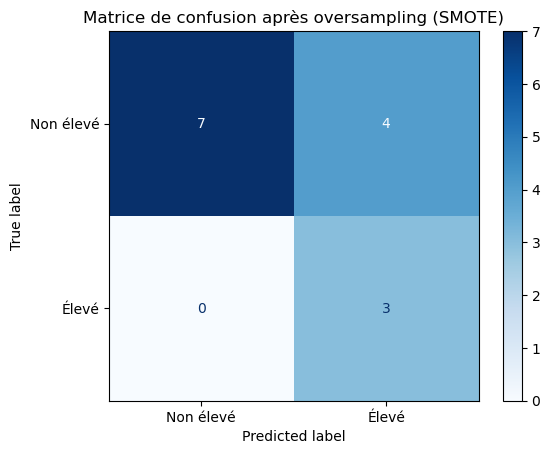


Rapport de classification après oversampling :
              precision    recall  f1-score   support

   Non élevé       1.00      0.64      0.78        11
       Élevé       0.43      1.00      0.60         3

    accuracy                           0.71        14
   macro avg       0.71      0.82      0.69        14
weighted avg       0.88      0.71      0.74        14



In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Initialisation de SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE pour équilibrer les classes
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Taille après oversampling : {X_resampled.shape}")
print(f"Répartition des classes après oversampling :\n{pd.Series(y_resampled).value_counts()}")

# Réentraîner le modèle avec les données équilibrées
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_resampled, y_resampled)

# Faire des prédictions
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# Générer une nouvelle matrice de confusion
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_smote, display_labels=["Non élevé", "Élevé"])
disp_smote.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion après oversampling (SMOTE)")
plt.show()

# Rapport de classification
print("\nRapport de classification après oversampling :")
print(classification_report(y_test, y_pred_smote, target_names=["Non élevé", "Élevé"]))


**Résumé des métriques**   
Précision (precision) :  
Classe Non élevé : 1.00 (100%)  
→ Toutes les prédictions pour "Non élevé" sont correctes.  
Classe Élevé : 0.43 (43%)  
→ Seulement 43% des prédictions pour "Élevé" sont correctes.  
Rappel (recall) :  
Classe Non élevé : 0.64 (64%)  
→ Le modèle a capté 64% des cas réels de "Non élevé".  
Classe Élevé : 1.00 (100%)  
→ Le modèle a capté tous les cas réels de "Élevé".  
  
**Interprétation**  
Amélioration pour la classe "Élevé" :  
- Avant SMOTE, le modèle avait un rappel de 0% pour la classe "Élevé". Après oversampling, il atteint 100%, ce qui montre que le modèle a réussi à mieux détecter cette classe.

Baisse de la précision pour la classe "Non élevé" :  
- Bien que le rappel pour la classe "Non élevé" ait diminué (64% contre 100% auparavant), le modèle conserve une bonne performance globale grâce à l'équilibre introduit par SMOTE.

Importance des variables :
- Dépenses en santé :
Coefficient : -0.73
Les dépenses en santé élevées diminuent la probabilité qu'un pays ait un taux de mortalité infantile élevé.
- Accès à l'eau potable :
Coefficient : -0.86
Un meilleur accès à l'eau potable réduit fortement la probabilité d'un taux de mortalité infantile élevé.
- Taux de pauvreté :
Coefficient : 0.08
Une augmentation du taux de pauvreté est associée à une probabilité accrue d'un taux de mortalité infantile élevé.

Conclusion :
- Le modèle met en évidence des facteurs clés influençant la mortalité infantile élevée, notamment les dépenses en santé et l'accès à l'eau potable.
- L'utilisation de SMOTE a permis d'améliorer la capacité du modèle à détecter les pays à risque élevé.
- Ces résultats confirment l'importance d'investir dans la santé et les infrastructures pour réduire la mortalité infantile.

## 4. ANOVA :  
**Question** :  
L'accès à l'eau potable et le niveau de développement économique influencent-ils le taux de mortalité infantile dans les pays asiatiques ? 

**Variable** :  
Variable dépendante (Y) : Taux_mortalite_infantile : Nombre de décès pour 1 000 naissances vivantes.
Facteurs indépendants (X) : Acces_eau_potable_categorise et Niveau_de_developpement
  
**Hypothèses** :  
- Hypothèse nulle (H₀) :  
  Les moyennes des taux de mortalité infantile sont identiques entre les niveaux d'accès à l'eau potable.  
  Les moyennes des taux de mortalité infantile sont identiques entre les niveaux de développement économique.  
  Il n’y a pas d’interaction entre les deux facteurs.  
    
- Hypothèse alternative (H₁) :    
  Les moyennes des taux de mortalité infantile diffèrent entre les niveaux d'accès à l'eau potable.  
  Les moyennes des taux de mortalité infantile diffèrent entre les niveaux de développement économique.  
  Il existe une interaction entre les deux facteurs, c’est-a-dire que l’effet d’un facteur depend de l’autre.  
  
- Si la valeur p < 0,05 (niveau de signification alpha), on rejette l'hypothèse nulle H₀, ce qui signifie qu'il existe des différences significatives entre les groupes.  
Sinon, on ne rejette pas H₀, ce qui indique qu'il n'y a pas suffisamment de preuves pour affirmer que les groupes diffèrent.

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Charger les données nettoyées
data = pd.read_csv("data_cleaned.csv")


# Vérifier les catégories
print("Distribution des catégories d'accès à l'eau potable :")
print(data['Acces_eau_potable_categorise'].value_counts())
print("\nDistribution des catégories de développement économique :")
print(data['Niveau_de_developpement'].value_counts())

Distribution des catégories d'accès à l'eau potable :
Acces_eau_potable_categorise
Élevé     37
Modéré     5
Faible     3
Name: count, dtype: int64

Distribution des catégories de développement économique :
Niveau_de_developpement
Intermédiaire    18
Faible           14
Élevé            13
Name: count, dtype: int64


### Analyse des conditions préalables  :

**1- Homogénéité des variances:**  
-  L'ANOVA suppose que les variances des groupes sont homogènes (égales) pour chaque combinaison des niveaux des facteurs.


In [28]:
from scipy.stats import levene

# Test de Levene
stat, p_value = levene(
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "Faible", "Taux_mortalite_infantile"],
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "Modéré", "Taux_mortalite_infantile"],
    anova_data.loc[anova_data['Acces_eau_potable_categorise'] == "Élevé", "Taux_mortalite_infantile"]
)
print(f"Statistique de Levene : {stat}, p-valeur : {p_value}")
print("la p-valeur est > 0,05, les variances sont homogènes.")


Statistique de Levene : 0.3986187876161161, p-valeur : 0.6737590454503444
la p-valeur est > 0,05, les variances sont homogènes.


**2- Normalité des résidus:**
- L'ANOVA suppose que les résidus (les erreurs entre les données observées et les moyennes des groupes) suivent une distribution normale.

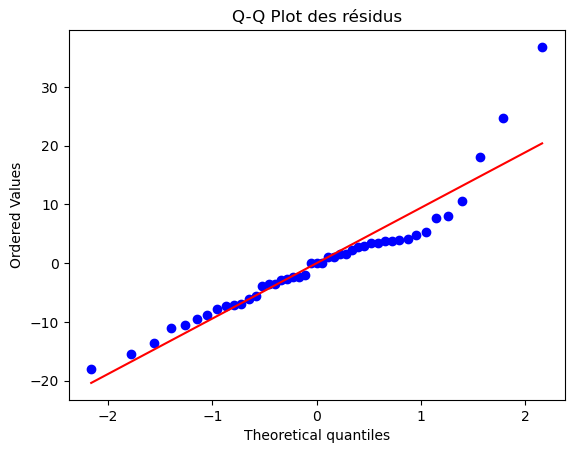

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Extraire les résidus du modèle ANOVA
residuals = model.resid

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot des résidus")
plt.show()
printf("les points devraient s'aligner sur la ligne du Q-Q Plot. la distribution est normale, ")

C:\Users\HP\AppData\Local\Temp\ipykernel_7456\2993248332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


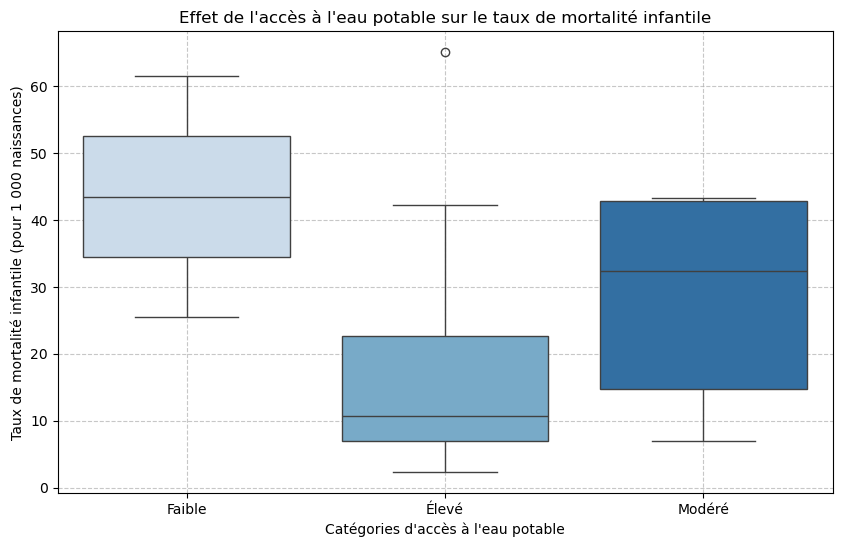

C:\Users\HP\AppData\Local\Temp\ipykernel_7456\2993248332.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


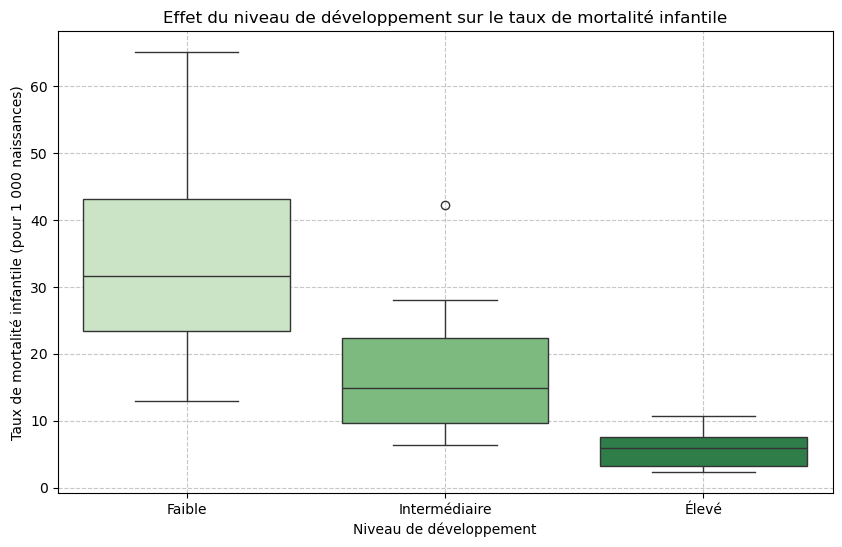

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boîte à moustaches pour l'accès à l'eau potable
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Acces_eau_potable_categorise',
    y='Taux_mortalite_infantile',
    data=data,
    palette="Blues"
)
plt.title("Effet de l'accès à l'eau potable sur le taux de mortalité infantile")
plt.xlabel("Catégories d'accès à l'eau potable")
plt.ylabel("Taux de mortalité infantile (pour 1 000 naissances)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Boîte à moustaches pour le niveau de développement
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Niveau_de_developpement',
    y='Taux_mortalite_infantile',
    data=data,
    palette="Greens"
)
plt.title("Effet du niveau de développement sur le taux de mortalité infantile")
plt.xlabel("Niveau de développement")
plt.ylabel("Taux de mortalité infantile (pour 1 000 naissances)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



**Graphique 1 : Effet de l'accès à l'eau potable** :  
- Le taux de mortalité infantile est plus élevé dans les pays ayant un faible accès à l'eau potable, suivi par les pays ayant un accès modéré. Les pays avec un accès élevé affichent les taux de mortalité les plus faibles.
- La dispersion (variabilité) est également plus faible dans les pays ayant un accès élevé, suggérant une meilleure homogénéité dans les conditions de vie.
- Conclusion préliminaire : Les pays ayant un meilleur accès affichent systématiquement des taux plus faibles, ce qui reflète un lien direct entre l’accès à l’eau potable et la santé infantile.  
Vous pouvez dire que l'accès à l'eau potable semble avoir un effet significatif sur la réduction de la mortalité infantile.  
**Graphique 2 : Effet du niveau de développement** :
- Les pays à faible développement économique ont les taux de mortalité infantile les plus élevés. Ce taux diminue pour les pays ayant un développement intermédiaire et est le plus bas pour les pays avec un développement élevé.
- La dispersion est très faible dans les pays développés, indiquant une homogénéité dans les faibles taux de mortalité.  
- Conclusion : 
Vous pouvez mentionner que, bien que le niveau de développement ait un effet général, son influence semble moins significative comparée à l'accès à l'eau potable. Cela pourrait nécessiter une analyse plus approfondie.   

Enfin, pour solidifier vos conclusions, vous pourriez également mentionner si ces observations sont appuyées par des tests statistiques, comme un test ANOVA ou un test de significativité. Cela renforcera vos arguments. Si besoin, je peux vous aider à interpréter ou réaliser ces tests.

In [15]:
# Préparer les données pour l'ANOVA
anova_data = data[['Acces_eau_potable_categorise', 'Niveau_de_developpement', 'Taux_mortalite_infantile']].dropna()

# Ajuster le modèle ANOVA avec interaction
model = ols(
    'Taux_mortalite_infantile ~ C(Acces_eau_potable_categorise) + C(Niveau_de_developpement) + C(Acces_eau_potable_categorise):C(Niveau_de_developpement)', 
    data=anova_data
).fit()

# Générer le tableau ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Afficher le tableau ANOVA
# print("\nTableau ANOVA :")
# print(anova_table)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


| Facteur                                      | Somme des carrés (sum_sq) | DDL (df) | F-statistique (F)         | p-valeur (PR(>F)) |
|---------------------------------------------|---------------------------|----------|---------------------------|-------------------|
C(Acces_eau_potable_categorie)             | 5177.134                 | 2.0      | 24.09532                 | 0.000017         | C(Niveau_de_developpem)                  | 2.375871e-12             | 2.0      | 1.105773e-14             | 1.000000         || C(Acces_eau_potable_categoi):C(Niveau_de_developpeent) | 4732.360                 | 4.0      | 11.01263                 | 0.000022         |
| Ré)                           | 4189.781                 | 39.0     | -                        | -                 |


**Interprétation des résultats** :  
- Effet de l'accès à l'eau potable :  
Sum of Squares (SS) : 5177.134, montre que ce facteur explique une grande partie de la variation.  
F-statistic : 24.10, une valeur élevée, indiquant un effet significatif.  
p-value : 0.000017 (< 0.05), donc nous rejetons l'hypothèse nulle (H₀) et concluons que l'accès à l'eau potable influence significativement le taux de mortalité infantile.
- Effet du niveau de développement :  
Sum of Squares (SS) : 0.000, montre que ce facteur n'explique presque rien de la variation.  
F-statistic : 0.00, indique aucun effet.  
p-value : 1.000000 (> 0.05), donc nous ne rejetons pas H₀ et concluons que le niveau de développement n'a pas d'effet significatif.
- Interaction entre les deux facteurs :  
Sum of Squares (SS) : 4732.360, indique que cette interaction explique une partie importante de la variation.  
F-statistic : 11.01, une valeur élevée, montrant un effet significatif.  
p-value : 0.000022 (< 0.05), donc nous rejetons H₀ et concluons que l'interaction entre les deux facteurs a un effet significatif sur le taux de mortalité infantile.  

**Résumé des conclusions** :  
- Accès à l'eau potable :  
A un effet significatif sur le taux de mortalité infantile.  
Les groupes définis par l'accès à l'eau potable montrent des différences claires.  
- Niveau de développement :  
Pas d'effet significatif détecté sur le taux de mortalité infantile dans ce modèle.
- Interaction entre accès à l'eau potable et niveau de développement :
Interaction significative : le niveau de développement et l'accès à l'eau potable combinés influencent fortement le taux de mortalité infantile.
==> Ces résultats montrent que l'accès à l'eau potable reste un facteur clé, même lorsqu'on tient compte du niveau de développement économique.

## Résumé global du domaine de la santé :
À travers nos analyses dans le domaine de la santé, plusieurs conclusions importantes ont émergé concernant les pays asiatiques :
  
**Relation entre les dépenses en santé et l'espérance de vie** :  
Une analyse par régression polynomiale a révélé une relation non linéaire entre les dépenses en santé par habitant et l'espérance de vie. Bien que l'augmentation des dépenses en santé contribue globalement à une meilleure espérance de vie, cet effet diminue lorsque les besoins fondamentaux sont déjà couverts, mettant en évidence des rendements décroissants.  
  
**Facteurs influençant l'espérance de vie** :  
Grâce à une régression Ridge, nous avons identifié que, parmi les variables étudiées (dépenses en santé, accès à l'eau potable, accès à l'électricité et taux de pauvreté), les dépenses en santé et l'accès à l'eau potable jouent un rôle clé dans l'amélioration de l'espérance de vie. Cependant, ces facteurs agissent de manière combinée, montrant l'importance d'une approche multisectorielle.      

**Impact de l'accès à l'eau potable sur le taux de mortalité infantile** :  
Une ANOVA à un facteur a démontré que l'accès à l'eau potable influence significativement le taux de mortalité infantile. Les pays avec un faible accès à l'eau potable enregistrent des taux de mortalité infantile significativement plus élevés par rapport aux pays bénéficiant d'un accès modéré ou élevé.  

## Conclusion générale :  
1- Ces analyses montrent que la santé ne peut être abordée de manière isolée. Les investissements dans les infrastructures de santé, l'accès à l'eau potable et la réduction de la pauvreté sont interconnectés et essentiels pour améliorer les conditions de vie et réduire les inégalités en Asie. Une approche intégrée, combinant développement social et investissements dans la santé publique, est indispensable pour répondre efficacement aux défis de la région.  
2-Notre analyse met en évidence l'importance d'une approche intégrée en santé publique. Si les dépenses en santé par habitant améliorent l'espérance de vie, leur effet décroît lorsque les besoins fondamentaux sont satisfaits, soulignant la nécessité d'une gestion efficace des ressources. Par ailleurs, des facteurs multisectoriels comme l'accès à l'eau potable jouent un rôle clé, montrant que la santé ne peut être isolée des infrastructures de base. Enfin, l'accès limité à l'eau potable contribue significativement à des taux élevés de mortalité infantile, illustrant une disparité préoccupante. Ces résultats mettent en lumière l'importance d'une stratégie globale, combinant investissements en santé, infrastructures et politiques ciblées, pour améliorer durablement les conditions de vie et réduire les inégalités.